## Data Cleaning & EDA

In [1]:
#import Libraries
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=XXXX;DATABASE=XXXX;UID=XXXX;PWD=XXXX')
cursor = conn.cursor()

In [3]:
sql = """
select *
from customer_churn_by_customer
"""
churn_raw = pd.read_sql(sql, conn)

In [4]:
churn_raw.head()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,region_name,age,customer_status,sex,customer_segment,generation,occupation,card,ussd,rib,newmobile
0,0000071,0,24,0,1,0,0,Lagos,45.0,Inactive,M,Churned Customer,Generation X,TRADER,1,0,0,1
1,0000112,8,1,14,22,3,0,Lagos,83.0,Inactive,M,Churned Customer,Retirees,TRADER,1,0,0,0
2,0000194,96,126,68,72,98,128,Head Office,75.0,Active,F,Churned Customer,Retirees,OTHERS,0,0,1,1
3,0000378,176,208,166,236,288,184,Abuja & North,70.0,Active,M,Churned Customer,Retirees,TRADER,1,0,1,1
4,0000378,176,208,166,236,288,184,Abuja & North,70.0,Active,M,Normal Customer,Retirees,TRADER,1,0,1,1


### Data Cleaning

In [5]:
churn_data = churn_raw.copy()

In [6]:
churn_data.shape

(2761592, 18)

In [7]:
churn_data.describe()

,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,age,card,ussd,rib,newmobile
count,2.761592e+06,2.761592e+06,2.761592e+06,2.761592e+06,2.761592e+06,2.761592e+06,2.754566e+06,2.761592e+06,2.761592e+06,2.761592e+06,2.761592e+06
mean,2.197887e+01,2.425062e+01,2.236112e+01,2.932407e+01,3.603706e+01,2.797727e+01,3.687307e+01,7.570543e-01,6.269735e-01,2.306872e-01,3.528352e-01
std,6.099754e+01,1.013595e+02,1.038998e+02,8.866428e+01,2.552315e+02,5.530000e+01,2.080336e+01,4.288626e-01,4.836092e-01,4.212727e-01,4.778521e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,8.000000e+00,7.000000e+00,1.200000e+01,1.700000e+01,1.200000e+01,3.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.300000e+01,2.600000e+01,2.400000e+01,3.500000e+01,4.500000e+01,3.300000e+01,4.500000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,3.470200e+04,6.661200e+04,7.094400e+04,5.233800e+04,2.045820e+05,2.053600e+04,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
#checking for duplicates
churn_data.duplicated().sum()

0

In [9]:
churn_data['customer_id'].duplicated().sum()

132677

we'll remove duplicate customer ids

In [10]:
churn_data.drop_duplicates(subset=['customer_id'], keep='last', inplace=True)

In [11]:
churn_data.shape

(2628915, 18)

In [12]:
#checking for missing values
churn_data.isnull().sum()

customer_id             0
cnt_nov                 0
cnt_dec                 0
cnt_jan                 0
cnt_feb                 0
cnt_mar                 0
cnt_apr                 0
region_name             0
age                  6655
customer_status         0
sex                 81800
customer_segment        0
generation           6656
occupation              0
card                    0
ussd                    0
rib                     0
newmobile               0
dtype: int64

In [13]:
churn_data.isnull().sum()/len(churn_data) * 100

customer_id         0.000000
cnt_nov             0.000000
cnt_dec             0.000000
cnt_jan             0.000000
cnt_feb             0.000000
cnt_mar             0.000000
cnt_apr             0.000000
region_name         0.000000
age                 0.253146
customer_status     0.000000
sex                 3.111550
customer_segment    0.000000
generation          0.253184
occupation          0.000000
card                0.000000
ussd                0.000000
rib                 0.000000
newmobile           0.000000
dtype: float64

we'll train two models, one that has null data imputed and one that has null values dropped, to see which performs better

In [14]:
churn_data1 = churn_data.copy()

In [15]:
churn_data1['age'] = churn_data1['age'].fillna(churn_data1['age'].median())
churn_data1['sex'] = churn_data1['sex'].fillna('O')
churn_data1['generation'] = churn_data1['generation'].fillna('Unknown')

In [16]:
churn_data1.isnull().sum()

customer_id         0
cnt_nov             0
cnt_dec             0
cnt_jan             0
cnt_feb             0
cnt_mar             0
cnt_apr             0
region_name         0
age                 0
customer_status     0
sex                 0
customer_segment    0
generation          0
occupation          0
card                0
ussd                0
rib                 0
newmobile           0
dtype: int64

In [17]:
#dropping the missing values due to its small amount
churn_data.dropna(inplace=True)

In [18]:
churn_data.isnull().sum()

customer_id         0
cnt_nov             0
cnt_dec             0
cnt_jan             0
cnt_feb             0
cnt_mar             0
cnt_apr             0
region_name         0
age                 0
customer_status     0
sex                 0
customer_segment    0
generation          0
occupation          0
card                0
ussd                0
rib                 0
newmobile           0
dtype: int64

In [19]:
churn_data.head()

,customer_id,cnt_nov,cnt_dec,cnt_jan,cnt_feb,cnt_mar,cnt_apr,region_name,age,customer_status,sex,customer_segment,generation,occupation,card,ussd,rib,newmobile
0,0000071,0,24,0,1,0,0,Lagos,45.0,Inactive,M,Churned Customer,Generation X,TRADER,1,0,0,1
1,0000112,8,1,14,22,3,0,Lagos,83.0,Inactive,M,Churned Customer,Retirees,TRADER,1,0,0,0
4,0000378,176,208,166,236,288,184,Abuja & North,70.0,Active,M,Normal Customer,Retirees,TRADER,1,0,1,1
5,0000465,29,19,23,35,59,38,Abuja & North,60.0,Active,M,Best Customer,Retirees,TRADER,0,1,0,0
6,0000532,45,9,16,18,45,20,Abuja & North,69.0,Active,M,Normal Customer,Retirees,BUSINESS,0,1,0,0


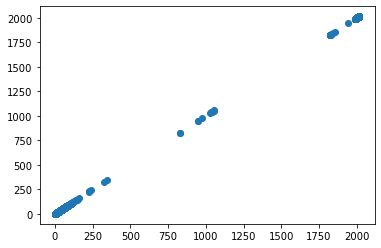

In [20]:
#checking the age column for outliers
plt.scatter(churn_data['age'], churn_data['age']);

ages that are imputted with high numbers must be unknown, we'll drop them

In [21]:
#dropping age less than 0 and greater than 127
abnormal_age = churn_data[(churn_data['age'] > 127) | (churn_data['age'] < 0)].index
abnormal_age1 = churn_data1[(churn_data1['age'] > 127) | (churn_data1['age'] < 0)].index

churn_data.drop(abnormal_age, inplace=True)
churn_data1.drop(abnormal_age1, inplace=True)

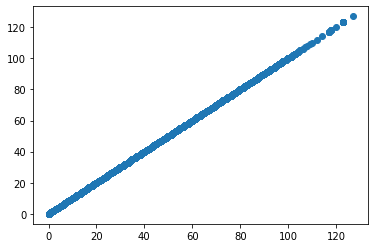

In [23]:
plt.scatter(churn_data['age'], churn_data['age']);

In [24]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2546918 entries, 0 to 2761591
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   customer_id       object 
 1   cnt_nov           int64  
 2   cnt_dec           int64  
 3   cnt_jan           int64  
 4   cnt_feb           int64  
 5   cnt_mar           int64  
 6   cnt_apr           int64  
 7   region_name       object 
 8   age               float64
 9   customer_status   object 
 10  sex               object 
 11  customer_segment  object 
 12  generation        object 
 13  occupation        object 
 14  card              int64  
 15  ussd              int64  
 16  rib               int64  
 17  newmobile         int64  
dtypes: float64(1), int64(10), object(7)
memory usage: 369.2+ MB


In [25]:
churn_data.columns

Index(['customer_id', 'cnt_nov', 'cnt_dec', 'cnt_jan', 'cnt_feb', 'cnt_mar',
       'cnt_apr', 'region_name', 'age', 'customer_status', 'sex',
       'customer_segment', 'generation', 'occupation', 'card', 'ussd', 'rib',
       'newmobile'],
      dtype='object')

In [26]:
#fix data types
churn_data['age'] = churn_data['age'].astype(int)
churn_data1['age'] = churn_data1['age'].astype(int)

cols = ['card', 'ussd', 'rib', 'newmobile']

for i in cols:
    churn_data[i] = churn_data[i].astype(str)
    churn_data1[i] = churn_data1[i].astype(str)

In [27]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2546918 entries, 0 to 2761591
Data columns (total 18 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   customer_id       object
 1   cnt_nov           int64 
 2   cnt_dec           int64 
 3   cnt_jan           int64 
 4   cnt_feb           int64 
 5   cnt_mar           int64 
 6   cnt_apr           int64 
 7   region_name       object
 8   age               int32 
 9   customer_status   object
 10  sex               object
 11  customer_segment  object
 12  generation        object
 13  occupation        object
 14  card              object
 15  ussd              object
 16  rib               object
 17  newmobile         object
dtypes: int32(1), int64(6), object(11)
memory usage: 359.5+ MB


In [28]:
churn_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628715 entries, 0 to 2761591
Data columns (total 18 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   customer_id       object
 1   cnt_nov           int64 
 2   cnt_dec           int64 
 3   cnt_jan           int64 
 4   cnt_feb           int64 
 5   cnt_mar           int64 
 6   cnt_apr           int64 
 7   region_name       object
 8   age               int32 
 9   customer_status   object
 10  sex               object
 11  customer_segment  object
 12  generation        object
 13  occupation        object
 14  card              object
 15  ussd              object
 16  rib               object
 17  newmobile         object
dtypes: int32(1), int64(6), object(11)
memory usage: 371.0+ MB


#### Checking the categorical columns

In [29]:
churn_data['sex'].value_counts()

M    1621618
F     896291
O      29008
m          1
Name: sex, dtype: int64

In [30]:
#fix issue in sex feature
churn_data.replace('m', 'M', inplace=True)
churn_data1.replace('m', 'M', inplace=True)

In [31]:
churn_data['sex'].value_counts()

M    1621619
F     896291
O      29008
Name: sex, dtype: int64

In [32]:
churn_data['region_name'].value_counts()

Abuja & North                         897808
South South & South East              720630
Lagos                                 532377
South West                            347320
Head Office                            47876
Corporate Banking                        849
Emerging Corporates                       28
Financial Institutions                    20
Large Corporate & General Business        10
Name: region_name, dtype: int64

In [33]:
churn_data['customer_status'].value_counts()

Active      2130609
Inactive     416309
Name: customer_status, dtype: int64

As expected dormant customers wouldn't have transacted in the last 6 months

In [34]:
churn_data['customer_segment'].value_counts()

Normal Customer                    856550
Need Attention                     542147
Churned Customer                   530530
Best Customer                      435628
Low-Value Active Loyal Customer    178303
High-Value New Customer              2562
Churned Best Customer                1198
Name: customer_segment, dtype: int64

In [35]:
#getting column for churners (customers that have been inactive for 60 days)
def churn(last_month, current_month):
    if last_month == 0 and current_month == 0:
        return 1
    else:
        return 0

In [36]:
churn_data['churn'] = churn_data.apply(lambda x: churn(x['cnt_mar'], x['cnt_apr']), axis=1)
churn_data1['churn'] = churn_data1.apply(lambda x: churn(x['cnt_mar'], x['cnt_apr']), axis=1)

### Exploratory Data Analysis

#### Univariate Analysis

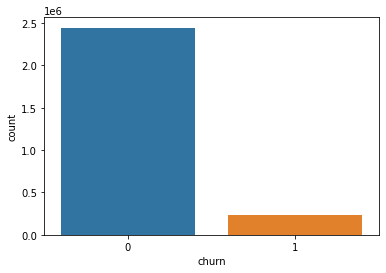

In [86]:
#Churn Column
sns.countplot(churn_data['churn']);

In [87]:
def ordered_bar_chart(column_name):
    base_color = sns.color_palette()[0]
    x = churn_data[column_name].value_counts().index
    y = churn_data[column_name].value_counts()

    plt.figure(figsize=(10, 5))
    plt.bar(x=x, height=y)
    plt.xticks(rotation=45);

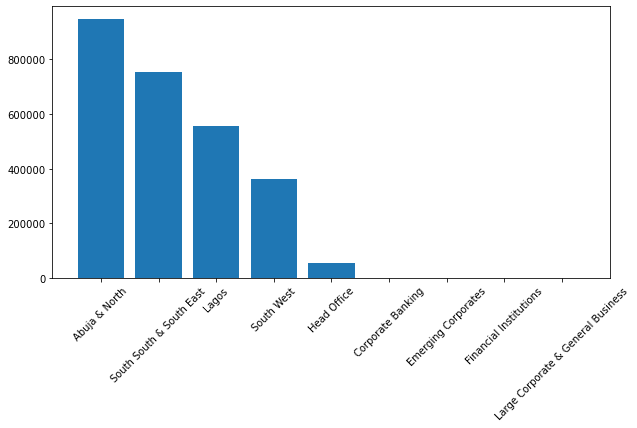

In [88]:
#region_name column
ordered_bar_chart('region_name')

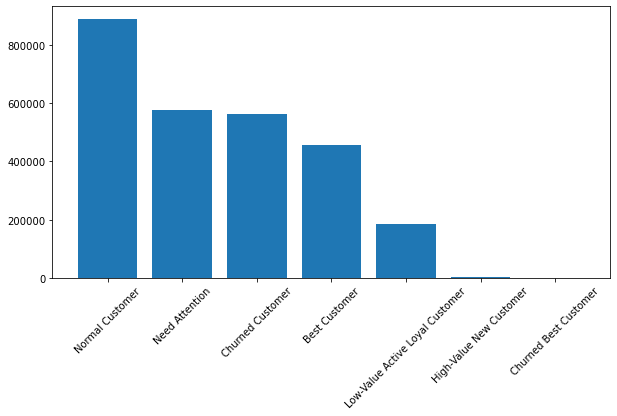

In [89]:
#customer_segment column
ordered_bar_chart('customer_segment')

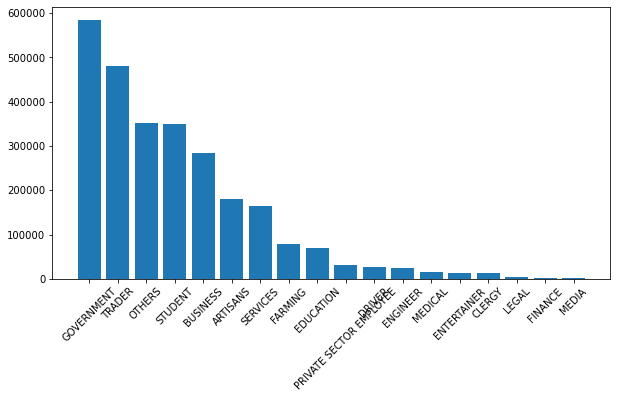

In [91]:
#occupation column
ordered_bar_chart('occupation')

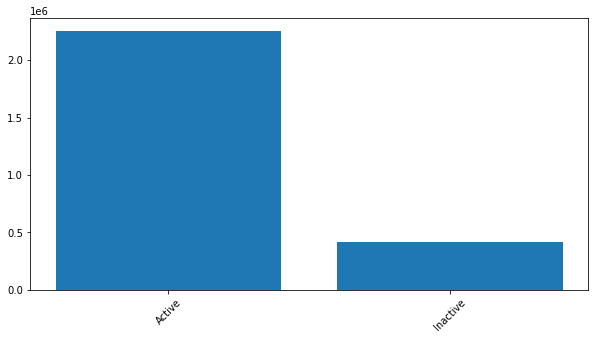

In [92]:
#customer_status column
ordered_bar_chart('customer_status')

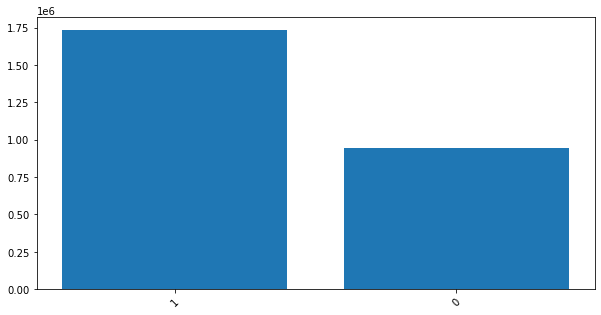

In [93]:
#ussd column
ordered_bar_chart('ussd')

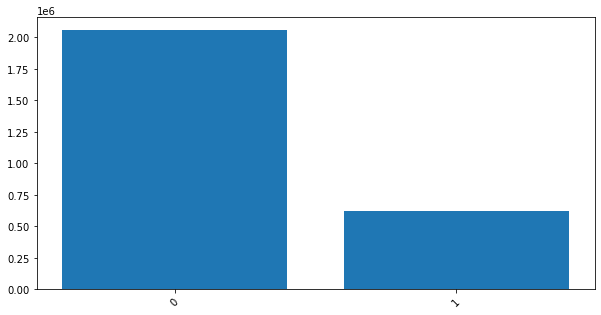

In [94]:
#rib column
ordered_bar_chart('rib')

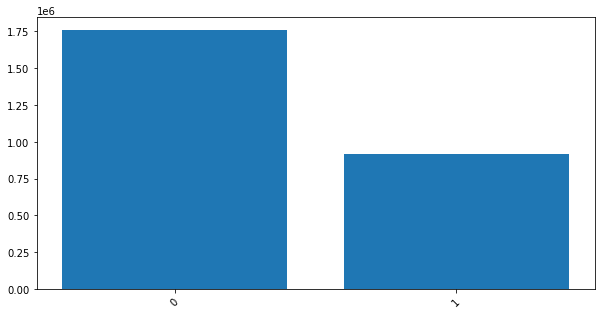

In [95]:
#newmobile column
ordered_bar_chart('newmobile')

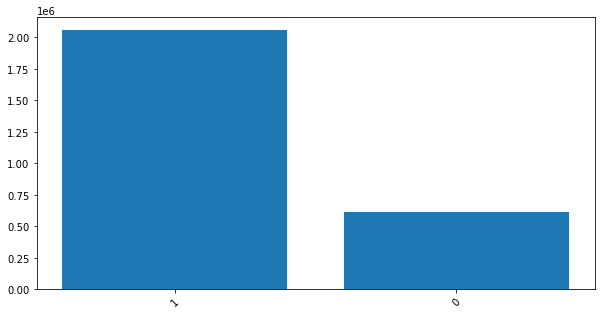

In [96]:
#card column
ordered_bar_chart('card')

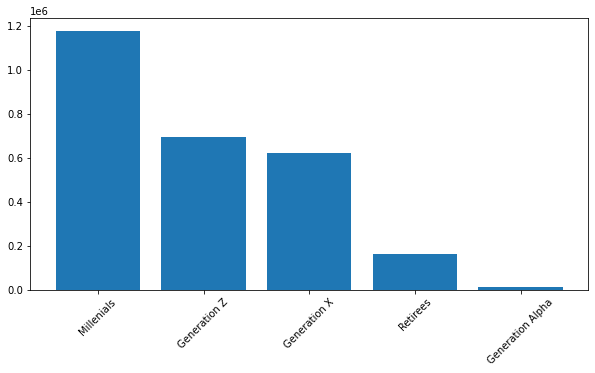

In [97]:
#generation column
ordered_bar_chart('generation')

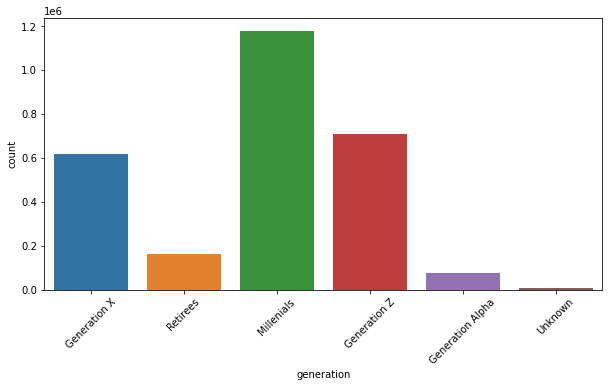

In [98]:
plt.figure(figsize=(10, 5))
sns.countplot('generation', data=churn_data1)
plt.xticks(rotation=45);

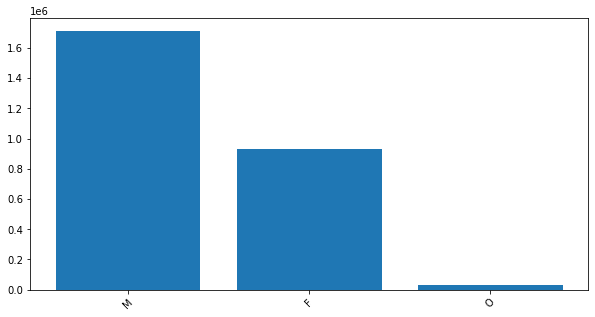

In [99]:
#generation column
ordered_bar_chart('sex')

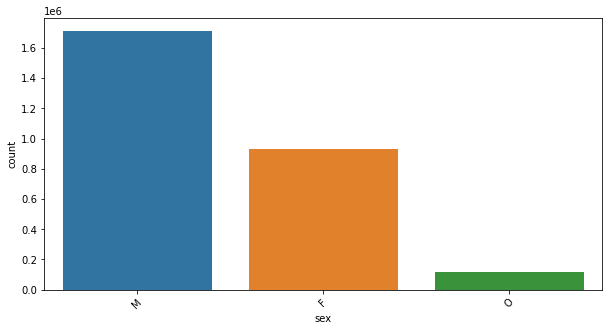

In [100]:
plt.figure(figsize=(10, 5))
sns.countplot('sex', data=churn_data1)
plt.xticks(rotation=45);

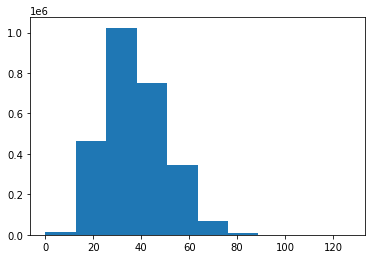

In [102]:
plt.hist(churn_data['age']);

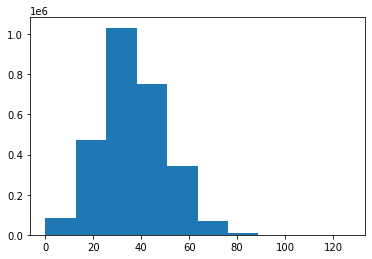

In [103]:
plt.hist(churn_data1['age']);

<AxesSubplot:xlabel='churn', ylabel='count'>

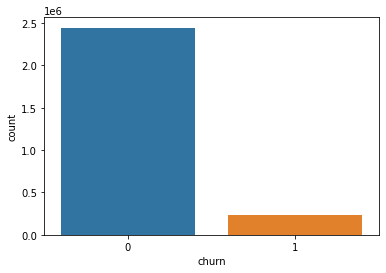

In [104]:
sns.countplot('churn', data=churn_data)

<AxesSubplot:xlabel='churn', ylabel='count'>

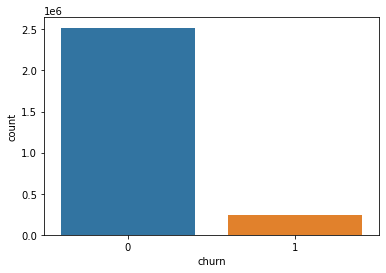

In [105]:
sns.countplot('churn', data=churn_data1)

#### Bivariate Analysis

In [106]:
churn_data.columns

Index(['customer_id', 'cnt_nov', 'cnt_dec', 'cnt_jan', 'cnt_feb', 'cnt_mar',
       'cnt_apr', 'region_name', 'age', 'customer_status', 'sex',
       'customer_segment', 'generation', 'occupation', 'card', 'ussd', 'rib',
       'newmobile', 'churn'],
      dtype='object')

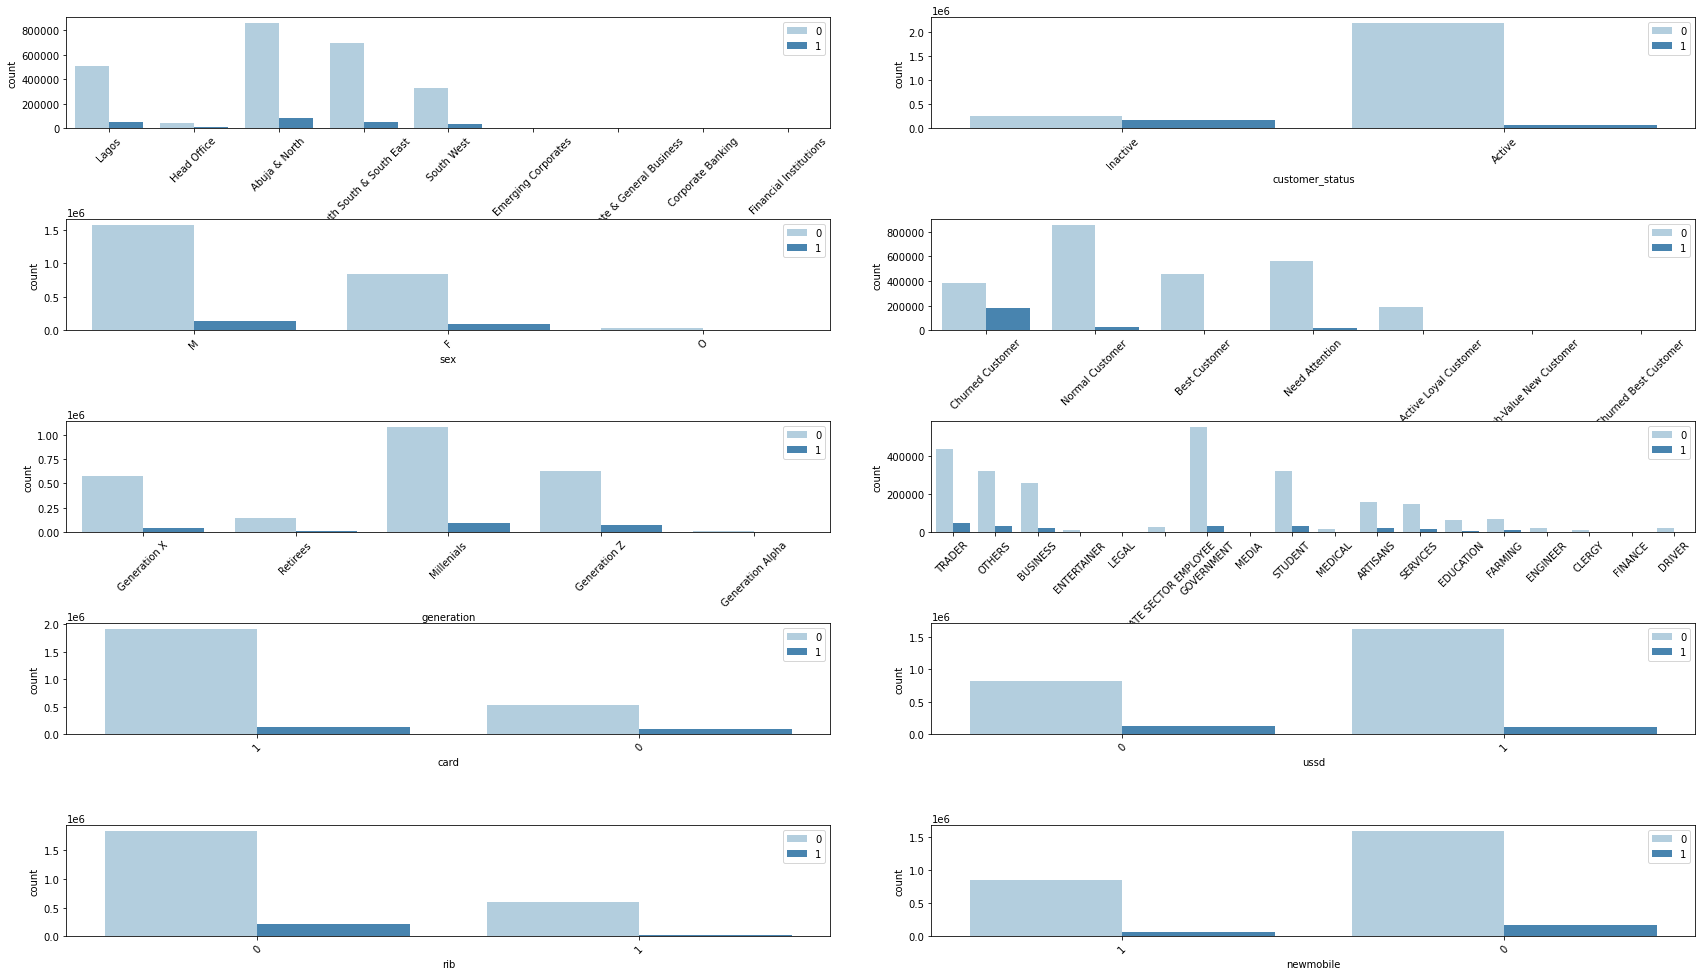

In [107]:
cat_cols = ['region_name', 'customer_status', 'sex', 'customer_segment', 'generation', 'occupation', 'card', 'ussd', 'rib',
       'newmobile']

fig, axes = plt.subplots(5, 2, figsize=[25, 15])
axes = axes.flatten()
index = 0
fig.tight_layout(pad=7.0)

for i in range(10):
    g = sns.countplot(data=churn_data, hue='churn', x=cat_cols[index], palette = 'Blues', ax=axes[i])
    g.tick_params(axis='x', labelrotation = 45)
    g.legend(loc = 1); # re-arrange legend to remove overlapping
    index += 1

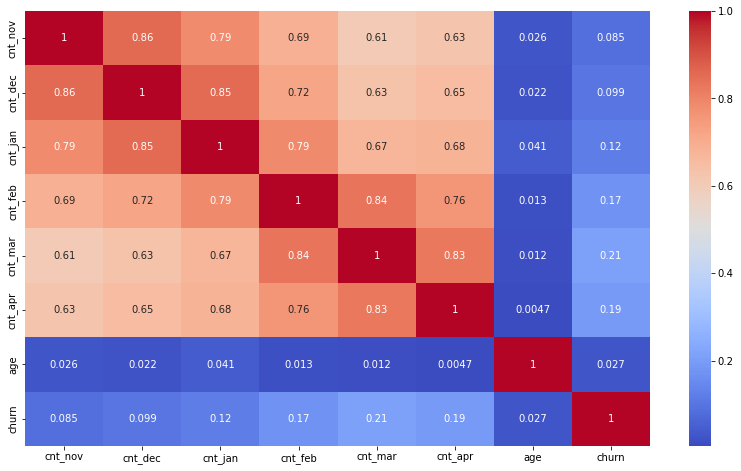

In [37]:
plt.figure(figsize=(14, 8))
sns.heatmap(churn_data.corr().abs(), annot = True, cmap ='coolwarm');

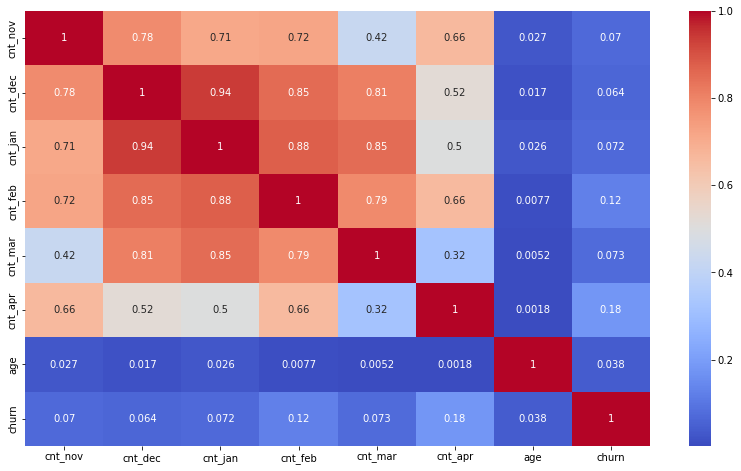

In [41]:
plt.figure(figsize=(14, 8))
sns.heatmap(churn_data1.corr().abs(), annot = True, cmap ='coolwarm');

In [43]:
churn_data.to_csv('data/churn_data_cleaned.csv', index=False)
churn_data1.to_csv('data/churn_data_cleaned1.csv', index=False)

### INFERENCE DATA

In [44]:
conn = pyodbc.connect('DRIVER={SQL Server Native Client 11.0};SERVER=XXXX;DATABASE=XXXX;UID=XXXX;PWD=XXXX')
cursor = conn.cursor()
print('Database logged in!')

Database logged in!


In [45]:
sql = "select * from customer_churn_by_customer_pred"

In [46]:
inf_raw = pd.read_sql(sql, conn)

In [47]:
inf = inf_raw.copy()

In [48]:
inf.head()

,customer_id,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,region_name,age,customer_status,sex,customer_segment,generation,occupation,card,ussd,rib,newmobile
0,4541699,30,32,0,0,0,0,South South & South East,28.0,Inactive,F,Churned Customer,Generation Z,ARTISANS,1,0,1,1
1,4541724,35,14,4,0,0,0,South West,32.0,Inactive,M,Churned Customer,Millenials,TRADER,1,0,0,0
2,4541743,9,20,17,14,26,16,Abuja & North,28.0,Active,F,Normal Customer,Generation Z,STUDENT,1,1,0,0
3,4541760,0,14,0,3,0,0,Abuja & North,38.0,Inactive,M,Churned Customer,Millenials,GOVERNMENT,1,0,0,0
4,4541763,10,8,4,6,4,3,Abuja & North,37.0,Active,M,Normal Customer,Millenials,ARTISANS,1,1,0,0


In [49]:
#checking for duplicates
inf.duplicated().sum()

0

In [50]:
inf['customer_id'].duplicated().sum()

12301

In [51]:
inf.drop_duplicates(subset=['customer_id'], keep='last', inplace=True)

In [52]:
#checking for missing values
inf.isnull().sum()

customer_id             0
mnth1                   0
mnth2                   0
mnth3                   0
mnth4                   0
mnth5                   0
mnth6                   0
region_name             0
age                  6219
customer_status         0
sex                 81549
customer_segment        0
generation           6220
occupation              0
card                    0
ussd                    0
rib                     0
newmobile               0
dtype: int64

In [53]:
inf1 = inf.copy()

In [54]:
inf1['age'] = inf1['age'].fillna(inf1['age'].median())
inf1['sex'] = inf1['sex'].fillna('O')
inf1['generation'] = inf1['generation'].fillna('Unknown')

In [55]:
inf1.isnull().sum()

customer_id         0
mnth1               0
mnth2               0
mnth3               0
mnth4               0
mnth5               0
mnth6               0
region_name         0
age                 0
customer_status     0
sex                 0
customer_segment    0
generation          0
occupation          0
card                0
ussd                0
rib                 0
newmobile           0
dtype: int64

In [56]:
inf.dropna(inplace=True)

In [57]:
inf.isnull().sum()

customer_id         0
mnth1               0
mnth2               0
mnth3               0
mnth4               0
mnth5               0
mnth6               0
region_name         0
age                 0
customer_status     0
sex                 0
customer_segment    0
generation          0
occupation          0
card                0
ussd                0
rib                 0
newmobile           0
dtype: int64

In [58]:
inf.head()

,customer_id,mnth1,mnth2,mnth3,mnth4,mnth5,mnth6,region_name,age,customer_status,sex,customer_segment,generation,occupation,card,ussd,rib,newmobile
0,4541699,30,32,0,0,0,0,South South & South East,28.0,Inactive,F,Churned Customer,Generation Z,ARTISANS,1,0,1,1
1,4541724,35,14,4,0,0,0,South West,32.0,Inactive,M,Churned Customer,Millenials,TRADER,1,0,0,0
2,4541743,9,20,17,14,26,16,Abuja & North,28.0,Active,F,Normal Customer,Generation Z,STUDENT,1,1,0,0
3,4541760,0,14,0,3,0,0,Abuja & North,38.0,Inactive,M,Churned Customer,Millenials,GOVERNMENT,1,0,0,0
4,4541763,10,8,4,6,4,3,Abuja & North,37.0,Active,M,Normal Customer,Millenials,ARTISANS,1,1,0,0


In [59]:
#drop age that is below 0 and above 127
ab_age = inf[(inf['age'] > 127) | (inf['age'] < 0)].index
ab_age1 = inf1[(inf1['age'] > 127) | (inf1['age'] < 0)].index

inf.drop(ab_age, inplace=True)
inf1.drop(ab_age1, inplace=True)

In [60]:
#change data types
inf['age'] = inf['age'].astype(int)
inf1['age'] = inf1['age'].astype(int)

In [61]:
#fix issue in sex feature
inf.replace('m', 'M', inplace=True)
inf1.replace('m', 'M', inplace=True)

In [62]:
inf['churn'] = inf.apply(lambda x: churn(x['mnth5'], x['mnth6']), axis=1)
inf1['churn'] = inf1.apply(lambda x: churn(x['mnth5'], x['mnth6']), axis=1)

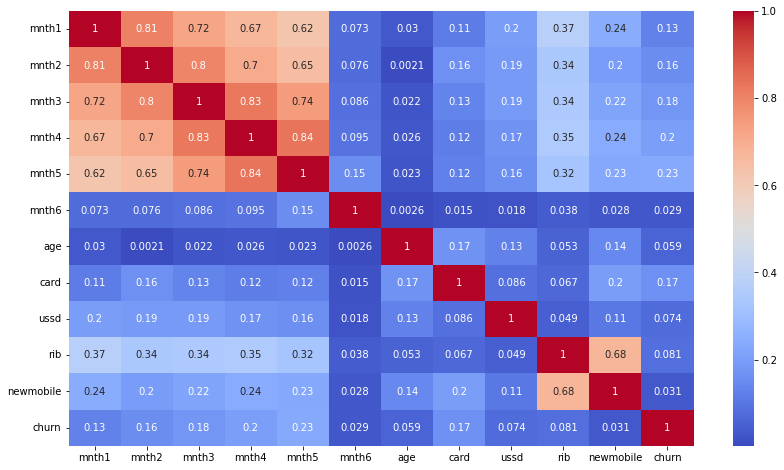

In [63]:
plt.figure(figsize=(14, 8))
sns.heatmap(inf.corr().abs(), annot = True, cmap ='coolwarm');

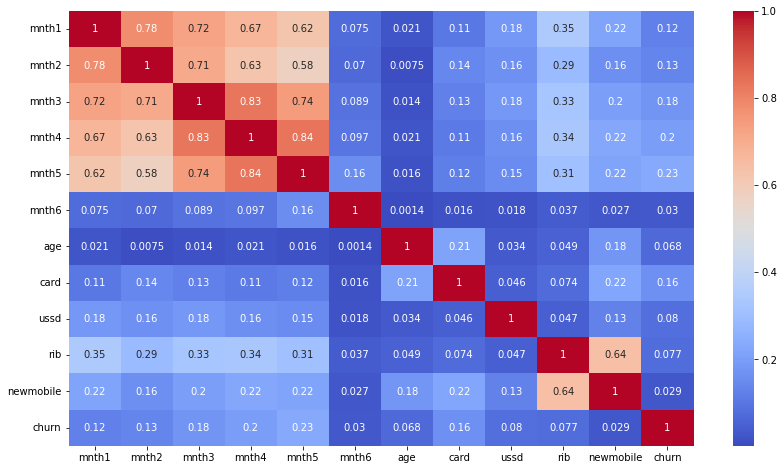

In [64]:
plt.figure(figsize=(14, 8))
sns.heatmap(inf1.corr().abs(), annot = True, cmap ='coolwarm');

In [65]:
inf.to_csv('data/inf_cleaned.csv', index=False)
inf1.to_csv('data/inf_cleaned1.csv', index=False)